In [2]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import missingno as msno

In [3]:
## 通过Pandas对于数据进行读取 
df_train = pd.read_csv('./cs-training.csv')

## 输出数据的大小信息
print('df shape:',df_train.shape)

df shape: (150000, 12)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [18]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [20]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [5]:
## 查看数值特征列的一些统计信息
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
temp = df_train.isnull().sum()
temp[temp>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

In [7]:
df_train = df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [8]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
# SeriousDlqin2yrs	90天以上逾期的人，未来2年违约	Y/N
# Age	年龄	整数
# RevolvingUtilizationOfUnsecuredLines	除房地产和汽车贷款等无分期付款债务外，信用卡和个人信用额度的总余额除以信贷限额	百分比
# DebtRatio	债务比（每月偿还的债务，赡养费，生活费除以每月的总收入）	百分比
# MonthlyIncome	每月收入	实数
# NumberOfOpenCreditLinesAndLoans	公开贷款(如汽车贷款或抵押贷款)和信用额度(如信用卡)的数量	整数
# NumberRealEstateLoansOrLines	抵押贷款和房地产贷款的额度（包括房屋净值信贷）	整数
# NumberOfTime30-59DaysPastDueNotWorse	借款人逾期30-59天的次数，但在过去两年没有更糟	整数
# NumberOfTime60-89DaysPastDueNotWorse	借款人逾期60-89天的次数，但在过去两年没有更糟	整数
# NumberOfTimes90DaysLate	借款人逾期90天（或以上）的次数	整数
# NumberOfDependents	除自己(配偶、子女等)以外的家庭受养人人数	整数

违约率: 0.06684


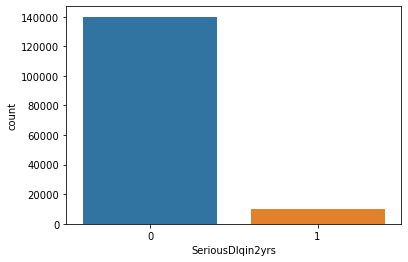

In [9]:
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
print('违约率:',df_train['SeriousDlqin2yrs'].mean())

In [10]:
# 缺失值比例
df_train.isnull().sum() / df_train.shape[0] * 100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

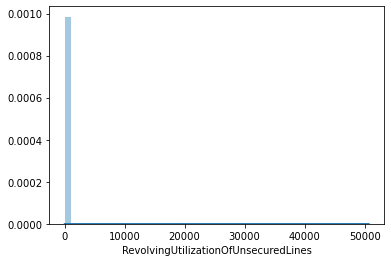

In [11]:
# RevolvingUtilizationOfUnsecuredLines 分布
df_train['RevolvingUtilizationOfUnsecuredLines'].value_counts()
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

In [12]:
len(df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>1])
3321/ df_train.shape[0]

# 2% 异常值

0.02214

In [ ]:
# 分箱处理

In [14]:

# 对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]
 
import math 

ages_bins =[-math.inf,25,40,50,60,70,math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=ages_bins)

df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [15]:
# 对于NumberOfDependents（家属人数）字段，分成6段  [-math.inf,2,4,6,8,10,math.inf]

dependents_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],bins=dependents_bins)

df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [16]:
# 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段

dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [93]:
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
# 按照等频方式分箱
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5)
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'], q=5)
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'], q=5)
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5)
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'], q=5,duplicates='drop')

In [95]:
df_train['NumberRealEstateLoansOrLines'].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [94]:
df_train[['NumberRealEstateLoansOrLines','bin_NumberRealEstateLoansOrLines']]

,NumberRealEstateLoansOrLines,bin_NumberRealEstateLoansOrLines
0,6,"(2.0, 54.0]"
1,0,"(-0.001, 1.0]"
2,0,"(-0.001, 1.0]"
3,0,"(-0.001, 1.0]"
4,1,"(-0.001, 1.0]"
...,...,...
149995,1,"(-0.001, 1.0]"
149996,1,"(-0.001, 1.0]"
149997,1,"(-0.001, 1.0]"
149998,0,"(-0.001, 1.0]"


In [96]:
# 查找bin的字段
bin_cols = [x for x in df_train.columns if x.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [107]:
# 计算IV值 衡量特征的预测能力 => 粗筛
def ca1_IV(df, feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    for i in range(df[feature].nunique()):
        #得到分箱
        val = list(df[feature].unique())[i]
        
        # 统计feature, feature_value, 这个value的个数
        temp1 = df[df[feature] == val].count()[feature]
        temp2 = df[(df[feature]==val) & (df[target]==1)].count()[feature]
        
#         print(val,temp1,temp2)
        
        lst.append([feature,val,temp1,temp2])
    data = pd.DataFrame(lst, columns = cols)
    data = data[data['Bad']>0]
    # 坏人/所有坏人的占比
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    # 好人/所有好人的个数占比
    data['Margin Good'] = (data['All'] -  data['Bad']) / (data['All'].sum() -  data['Bad'].sum())
    data['WOE'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['IV'] = (data['Margin Bad'] - data['Margin Good']) * data['WOE']
#     print(data)
    return data['IV'].sum()

ca1_IV(df_train,'bin_age','SeriousDlqin2yrs')

0.24041120302785982

In [108]:
# 所有类别的IV 值

for col in bin_cols:
    temp_IV = ca1_IV(df_train,col,'SeriousDlqin2yrs')
    print(col, temp_IV)

bin_age 0.24041120302785982
bin_NumberOfDependents 0.014121519021911784
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.09578345329829879
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.0120914141106244


* 选择IV >0.1 作为重要的变量  放到后续的模型中进行预测
* bin_age 0.24041120302785982
* bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
* bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
* bin_NumberOfTimes90DaysLate 0.49160685733515563
* bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887


In [114]:
def cal_WOE(df, feature,target):
    for feature in feature:
        df_woe = df.groupby(feature).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))

        df_woe = df_woe.reset_index()
        df_woe.rename(columns = {target+'sum':'bad',target+'count':'all'},inplace = True)

        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['Margin Bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['Margin Good'] = df_woe['good'] / df_woe['good'].sum()

        df_woe['WOE'] = np.log((df_woe['Margin Bad']+0.5) / (df_woe['Margin Good']+0.5))

        df_woe.columns = [x if x == feature else x+'_'+feature for x in df_woe.columns]

        df = df.merge(df_woe,on=feature,how='left')
    return df

In [115]:
bin_cols = ['bin_age','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate',
            'bin_RevolvingUtilizationOfUnsecuredLines']

df_woe = cal_WOE(df_train,bin_cols,'SeriousDlqin2yrs')

In [117]:
woe_cols = [x for x in df_woe.columns if 'WOE' in x]
woe_cols

['WOE_bin_age',
 'WOE_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'WOE_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'WOE_bin_NumberOfTimes90DaysLate',
 'WOE_bin_RevolvingUtilizationOfUnsecuredLines']

In [116]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfTimes90DaysLate,Margin Bad_bin_NumberOfTimes90DaysLate,Margin Good_bin_NumberOfTimes90DaysLate,WOE_bin_NumberOfTimes90DaysLate,bad_bin_RevolvingUtilizationOfUnsecuredLines,all_bin_RevolvingUtilizationOfUnsecuredLines,good_bin_RevolvingUtilizationOfUnsecuredLines,Margin Bad_bin_RevolvingUtilizationOfUnsecuredLines,Margin Good_bin_RevolvingUtilizationOfUnsecuredLines,WOE_bin_RevolvingUtilizationOfUnsecuredLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,138586,0.829743,0.990084,-0.113847,5963,30000,24037,0.594754,0.171725,0.488436
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,138586,0.829743,0.990084,-0.113847,5963,30000,24037,0.594754,0.171725,0.488436
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,138586,0.829743,0.990084,-0.113847,2107,30000,27893,0.210154,0.199273,0.015440
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,138586,0.829743,0.990084,-0.113847,877,30000,29123,0.087473,0.208060,-0.186699
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,138586,0.829743,0.990084,-0.113847,5963,30000,24037,0.594754,0.171725,0.488436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,138586,0.829743,0.990084,-0.113847,497,30000,29503,0.049571,0.210775,-0.257218
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,138586,0.829743,0.990084,-0.113847,2107,30000,27893,0.210154,0.199273,0.015440
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,...,138586,0.829743,0.990084,-0.113847,877,30000,29123,0.087473,0.208060,-0.186699
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,138586,0.829743,0.990084,-0.113847,582,30000,29418,0.058049,0.210168,-0.241054


In [187]:
feature_cols = ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'NumberOfTime60-89DaysPastDueNotWorse',
               'RevolvingUtilizationOfUnsecuredLines']
len(feature_cols)


5

In [188]:
# 计算woe规则手册
df_bin_to_woe = pd.DataFrame(columns=['feature','bin','woe'])
for feature in feature_cols:
    b = 'bin_'+ feature
    w = 'WOE_bin_'+ feature
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['feature'] = feature
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe

,feature,bin,woe
0,age,"(40.0, 50.0]",0.077641
1,age,"(25.0, 40.0]",0.160922
5,age,"(70.0, inf]",-0.143782
6,age,"(50.0, 60.0]",-0.026202
15,age,"(60.0, 70.0]",-0.146934
19,age,"(-inf, 25.0]",0.027533
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",0.170512
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-0.161959
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",0.100151
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",0.055393


In [189]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression


X_train,X_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state = 2021)
model = LogisticRegression(random_state = 2021)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Accurary:',accuracy_score(y_pred,y_test))
print('AUC:',roc_auc_score(y_pred,y_test))
print('F1:',f1_score(y_pred,y_test))

Accurary: 0.9351666666666667
AUC: 0.7673214197909608
F1: 0.1946169772256729


In [190]:
df_bin_to_woe

,feature,bin,woe
0,age,"(40.0, 50.0]",0.077641
1,age,"(25.0, 40.0]",0.160922
5,age,"(70.0, inf]",-0.143782
6,age,"(50.0, 60.0]",-0.026202
15,age,"(60.0, 70.0]",-0.146934
19,age,"(-inf, 25.0]",0.027533
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",0.170512
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-0.161959
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",0.100151
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",0.055393


In [193]:
A = 650 # 基础分
B = 72.13 # PDO(50) / ln(2)

# 生成评分卡.
def generate_scorecard(model_coef, df_rule, features, B):
    coef = model_coef[0]
    lst = []
    cols = ['Variable', 'Binning','Score']
    for i in range(len(features)):
        f = features[i]
        # 筛选该f的WOE规则
        df = df_rule[df_rule['feature']==f]
        for index, row in df.iterrows():
            # 每个字段的评分 都与三个值有关 -B,coef[i],row['woe'] 
            lst.append([f,row['bin'],int(round(-B*coef[i]*row['woe']))])
    data = pd.DataFrame(lst, columns=cols)    
    return data


score_card = generate_scorecard(model.coef_,df_bin_to_woe,feature_cols, B)
score_card

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-11
1,age,"(25.0, 40.0]",-23
2,age,"(70.0, inf]",21
3,age,"(50.0, 60.0]",4
4,age,"(60.0, 70.0]",21
5,age,"(-inf, 25.0]",-4
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-54
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",52
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-32
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-18


In [229]:

def str_to_int(x):
    if x == '-inf':
        return -999999
    if x == 'inf':
        return 999999
    return float(x)

# value映射到bin
def map_value_to_bin(feature_value, feature_to_bin):
    for index, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        binnings = bins[1:-1].split(',')
        in_range = True
        if feature_value <= str_to_int(binnings[0]):
            in_range = False
        if feature_value > str_to_int(binnings[1]):
            in_range = False
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        
        # 得到关于col的规则
        feature_to_bin = score_card[score_card['Variable']==col]
        # df样本中的col
        feature_value = df[col]
        # 将col数值 映射到Binning
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        # 累加score
        selected_score = feature_to_bin[feature_to_bin['Binning'] == selected_bin]['Score'].iloc[0]
        # 累加到整体的score
        score += selected_score
    return score

# 按照评分卡规则 score_card 计算df中的分数
def cal_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score, args=(score_card,),axis = 1)
    df['score'] = df['score'] + A
    df['score'] = df['score'] - B * model.intercept_[0]
    df['score'] = df['score'].astype(int)
    
    return df

In [230]:
model.coef_

array([[2.01474863, 4.41513752, 7.49352596, 7.67244361, 2.54213089]])

In [231]:
model.intercept_

array([-1.10555387])

In [234]:
# 随机筛选好人
good_sample = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_sample = good_sample[feature_cols]

# 计算分数
cal_score_with_card(good_sample, score_card, 650)


,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,score
136106,62,0,0,1,0.132013,933
31503,48,0,0,0,0.082680,914
19182,42,1,0,0,0.097259,901
67698,67,0,0,0,0.095616,933
34382,50,0,0,0,0.000000,911


In [236]:
# 随机筛选坏人
bad_sample = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
bad_sample = bad_sample[feature_cols]

# 计算分数
cal_score_with_card(bad_sample, score_card, 650)


,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,score
24350,55,0,0,0,1.000000,792
31644,51,0,0,0,0.070328,929
105602,37,2,0,1,0.989132,659
38169,48,1,0,0,0.917446,777
90896,45,0,0,0,0.359657,864
